# 💳 Fraud Detection Dataset - Project Overview

This dataset contains transactional data intended for analyzing and detecting fraudulent activity in financial operations. It includes detailed information about each transaction such as transaction amount, type, date and time, merchant location, and user demographics (age, gender, etc.).

### 📁 Key Columns:
- `trans_date_trans_time`: The date and time when the transaction occurred.
- `category`: The category/type of the transaction (e.g., gas, grocery).
- `amt`: The dollar amount of the transaction.
- `merchant`, `city`, `state`, `zip`: Details of the merchant's location.
- `lat`, `long`: Geographical coordinates of the transaction.
- `job`, `gender`, `dob`: Demographic attributes of the cardholder.
- `is_fraud`: Binary target variable indicating whether the transaction was fraudulent (1) or not (0).

### 🎯 Objective:
The primary goal is to build machine learning models that can **accurately classify fraudulent transactions**. The dataset also supports secondary tasks such as:
- **Customer segmentation** based on location and spending patterns
- **Anomaly detection** to spot outlier behavior
- **Geospatial analysis** to detect regional fraud trends
- **Behavioral analysis** to understand transaction patterns over time

This notebook will include data cleaning, exploratory data analysis (EDA), feature engineering, model training, and evaluation.


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split , cross_validate ,cross_val_predict, GridSearchCV , StratifiedKFold
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder , LabelEncoder , PolynomialFeatures , FunctionTransformer
from category_encoders import BinaryEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier , BaggingClassifier , AdaBoostClassifier , GradientBoostingClassifier , RandomForestClassifier
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score , recall_score , precision_score , classification_report , confusion_matrix , ConfusionMatrixDisplay
from geopy.distance import great_circle
import joblib

## Over View Of The Data 

In [41]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\credit_card_transactions_Final.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,566020,2019-08-29 03:02:57,375767678113375,"fraud_Osinski, Ledner and Leuschke",grocery_pos,274.34,Christopher,Patterson,M,16744 Campbell Wall Apt. 372,...,-78.7717,4367,Waste management officer,1962-04-12,a27db88934e6a55016455e7ea13ad9fe,1346209377,38.299072,-78.042610,1,22733.0
1,149646,2019-03-21 23:05:44,4180192513916047166,"fraud_Zboncak, Rowe and Murazik",shopping_net,991.85,Brian,Ray,M,055 Stephanie Turnpike Suite 559,...,-80.1629,7369,TEFL teacher,1927-02-03,e751c7f0c1691e4a39c0c3650cc16a24,1332371144,37.080287,-80.869008,1,24301.0
2,126076,2019-03-11 00:33:58,30143713661454,fraud_Marks Inc,gas_transport,18.53,Nicholas,Thornton,M,5270 Megan Burg Suite 756,...,-96.5969,140,"Embryologist, clinical",1942-01-06,b4a76d529b8bfca3125d2edbb76d6b79,1331426038,49.597004,-95.798193,1,NaN
3,647749,2019-10-02 22:54:57,346208242862904,fraud_Gerlach Inc,shopping_net,980.39,Tabitha,Reyes,F,20938 Barbara Viaduct,...,-74.0163,1577385,"Pharmacist, hospital",1961-05-13,1a2f9e0f1e90a793c2d5c68f0f942a28,1349218497,40.414072,-74.138737,1,7730.0
4,1255547,2020-06-07 00:21:34,4334230547694630,"fraud_Raynor, Feest and Miller",gas_transport,19.60,Scott,Martin,M,7483 Navarro Flats,...,-111.0292,471,"Education officer, museum",1967-08-02,6ba4fa50d2c01112ceba46f7639e448e,1370564494,43.151239,-111.944629,1,83236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,905400,2019-12-28 07:40:37,4425161475596168,fraud_Upton PLC,entertainment,28.97,Brooke,Fisher,F,815 Heather Divide Apt. 965,...,-100.3900,103927,Drilling engineer,1962-06-27,23d66b5f56edd1cbc1cc71061bb41250,1356680437,30.848409,-101.009999,0,NaN
4466,1000774,2020-02-14 23:44:38,5410056176712193,fraud_Ernser-Lynch,food_dining,37.64,Jeffrey,Krause,M,4742 Alexandria Mountain,...,-87.8235,4306,Art therapist,1989-10-19,c56b0d22b697ea2bf8b27528273223a8,1360885478,43.826205,-87.899086,0,53020.0
4467,950768,2020-01-16 11:48:55,4992346398065154184,fraud_Cummings LLC,gas_transport,40.64,Benjamin,Kim,M,920 Patrick Light,...,-89.2187,532,Audiological scientist,1956-01-09,54fe2d9257b475ea72719f9bcba722ff,1358336935,42.141076,-88.996511,0,61052.0
4468,769712,2019-11-25 12:26:57,503848303379,fraud_Botsford and Sons,home,91.63,Gregory,Wallace,M,27203 Darrell Landing,...,-82.0916,3776,Sport and exercise psychologist,1976-09-12,0be25472d73d302dc58aff7d4f13b95a,1353846417,26.097527,-82.742873,0,NaN


In [42]:
df['is_fraud'].value_counts()

is_fraud
0    3000
1    1470
Name: count, dtype: int64

## EDA of the data 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4470 entries, 0 to 4469
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4470 non-null   int64  
 1   trans_date_trans_time  4470 non-null   object 
 2   cc_num                 4470 non-null   int64  
 3   merchant               4470 non-null   object 
 4   category               4470 non-null   object 
 5   amt                    4470 non-null   float64
 6   first                  4470 non-null   object 
 7   last                   4470 non-null   object 
 8   gender                 4470 non-null   object 
 9   street                 4470 non-null   object 
 10  city                   4470 non-null   object 
 11  state                  4470 non-null   object 
 12  zip                    4470 non-null   int64  
 13  lat                    4470 non-null   float64
 14  long                   4470 non-null   float64
 15  city

In [44]:
df.isnull().mean()*100

Unnamed: 0                0.000000
trans_date_trans_time     0.000000
cc_num                    0.000000
merchant                  0.000000
category                  0.000000
amt                       0.000000
first                     0.000000
last                      0.000000
gender                    0.000000
street                    0.000000
city                      0.000000
state                     0.000000
zip                       0.000000
lat                       0.000000
long                      0.000000
city_pop                  0.000000
job                       0.000000
dob                       0.000000
trans_num                 0.000000
unix_time                 0.000000
merch_lat                 0.000000
merch_long                0.000000
is_fraud                  0.000000
merch_zipcode            15.480984
dtype: float64

### Check dupicated and remove is exist

In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
df.reset_index(inplace=True ,drop=True)

### Drop unnecessary columns because these are not useful for ML models and causes problems

In [47]:
df.drop(['Unnamed: 0' , 'cc_num' , 'merchant' , 'first','last' , 'zip','trans_num' , 'street','merch_zipcode'] ,axis=1 , inplace=True)

In [48]:
df.describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4470.000000,4470.000000,4470.000000,4.470000e+03,4.470000e+03,4470.000000,4470.000000,4470.000000
mean,217.677638,38.603568,-90.180962,9.680220e+04,1.348867e+09,38.598481,-90.181042,0.328859
std,324.064280,5.136739,13.967237,3.266584e+05,1.324584e+07,5.194997,13.982572,0.469851
min,1.020000,20.027100,-165.672300,2.300000e+01,1.325409e+09,19.608886,-166.556928,0.000000
25%,17.375000,34.743700,-96.809400,7.465000e+02,1.337581e+09,34.807780,-96.933670,0.000000
50%,65.665000,39.401500,-87.357850,2.501000e+03,1.349095e+09,39.404295,-87.340709,0.000000
75%,282.050000,42.075875,-80.130825,2.112500e+04,1.359531e+09,42.052804,-80.141044,1.000000
max,2859.990000,66.693300,-67.950300,2.906700e+06,1.371797e+09,67.441518,-67.103528,1.000000


### Make an Overview and destruction of the numeric features

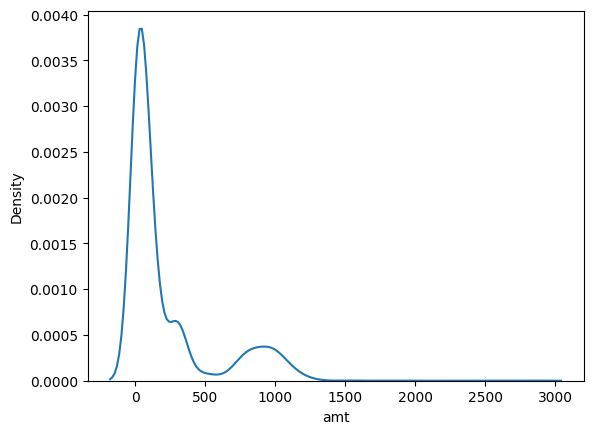

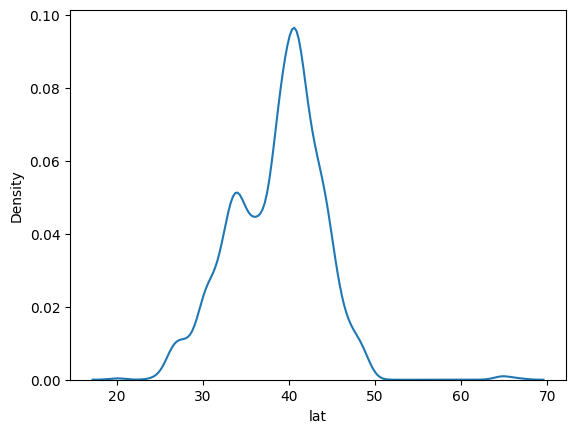

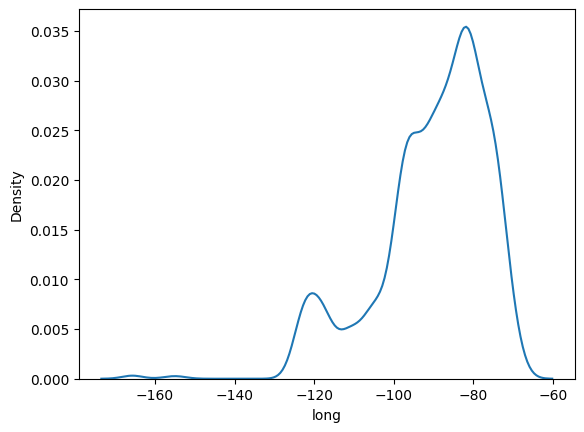

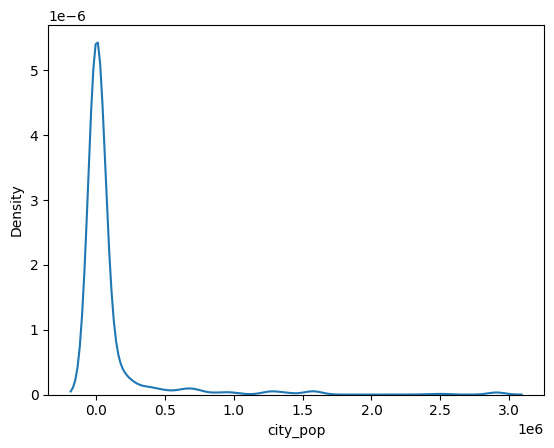

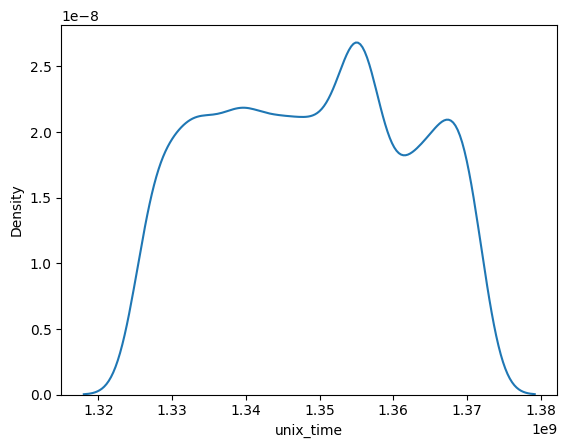

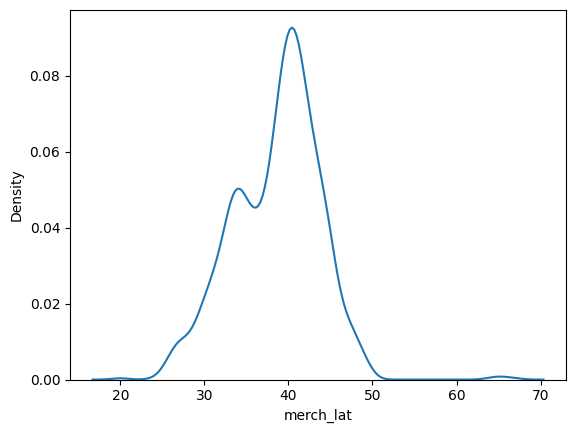

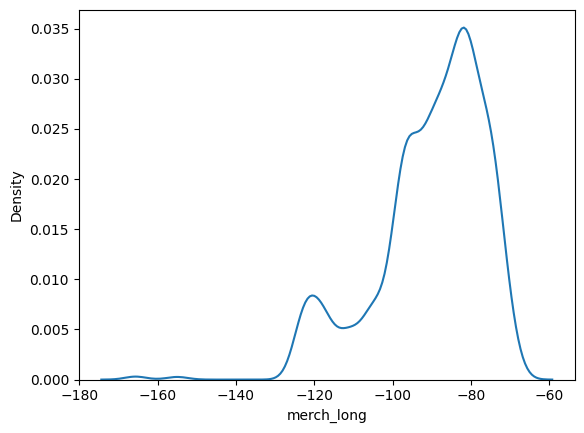

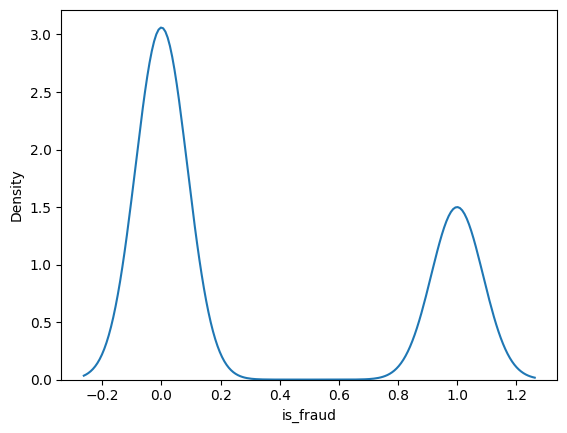

In [49]:
for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.kdeplot(df[col])

In [50]:
df['is_fraud'].value_counts()

is_fraud
0    3000
1    1470
Name: count, dtype: int64

In [51]:
df.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [52]:
df['trans_date_trans_time']

0       2019-08-29 03:02:57
1       2019-03-21 23:05:44
2       2019-03-11 00:33:58
3       2019-10-02 22:54:57
4       2020-06-07 00:21:34
               ...         
4465    2019-12-28 07:40:37
4466    2020-02-14 23:44:38
4467    2020-01-16 11:48:55
4468    2019-11-25 12:26:57
4469    2019-09-02 19:08:12
Name: trans_date_trans_time, Length: 4470, dtype: object

### Convert this column from object to DateTime and make an feature extraction from this column

In [53]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'] , errors='coerce')

In [54]:
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
# df['day_name'] = df['trans_date_trans_time'].dt.day_name()
# df['month_name'] = df['trans_date_trans_time'].dt.month_name()
# df['hour'] = df['trans_date_trans_time'].dt.hour
# df['minute'] = df['trans_date_trans_time'].dt.minute

In [55]:
df.drop(['trans_date_trans_time'] , axis=1 , inplace=True)

In [56]:
df['amt']

0       274.34
1       991.85
2        18.53
3       980.39
4        19.60
         ...  
4465     28.97
4466     37.64
4467     40.64
4468     91.63
4469     41.57
Name: amt, Length: 4470, dtype: float64

<Axes: xlabel='amt', ylabel='Density'>

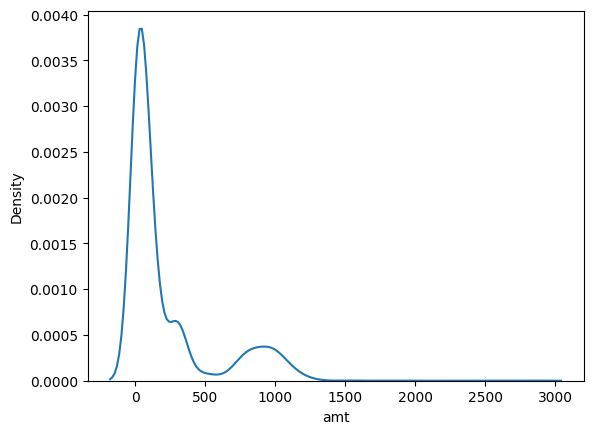

In [57]:
sns.kdeplot(data=df , x = df['amt'])

### Applying `log` for this `amt` and `city_population` to make normal distribution for these columns 

In [58]:
df['amount'] = np.log1p(df['amt'])

In [59]:
df.drop(['amt'] , axis=1 , inplace=True)

<Axes: xlabel='amount', ylabel='Density'>

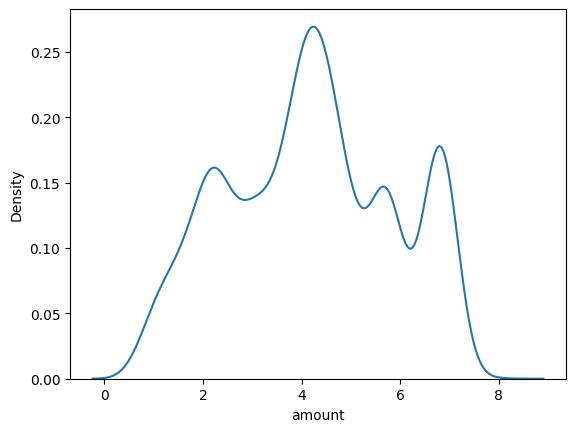

In [60]:
sns.kdeplot(df['amount'])

In [61]:
df['city_population'] = np.log1p(df['city_pop'])

<Axes: xlabel='city_population', ylabel='Density'>

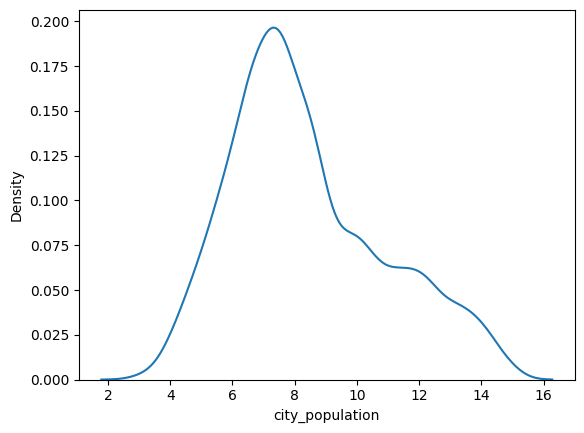

In [62]:
sns.kdeplot(df['city_population'])

In [63]:
df.drop(['city_pop'] , axis=1 , inplace=True)

## Feature Extraction 
### From `(lat and long)` of the customer and `(merch_lat and merch_long)` extract the destance from customer to merch 


In [64]:
def get_distance(data):
    pick_up = (data['lat'] , data['long'])
    destination = (data['merch_lat'] , data['merch_long'])
    return great_circle(pick_up , destination).kilometers

In [65]:
df['destiance_c_to_m'] = df.apply(get_distance , axis=1)

<Axes: xlabel='destiance_c_to_m', ylabel='Count'>

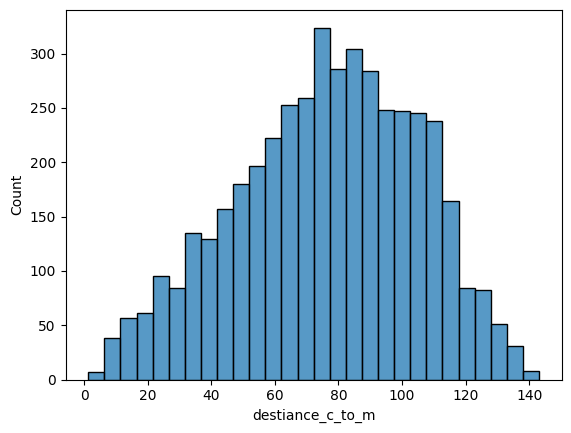

In [66]:
sns.histplot(data=df , x = df['destiance_c_to_m'])

### Drop these column because they are not useful for ML model

In [67]:
df.drop(['lat' , 'long' , 'merch_lat' ,'merch_long'] , axis=1 , inplace=True)

In [68]:
df

,category,gender,city,state,job,dob,unix_time,is_fraud,year,month,day,amount,city_population,destiance_c_to_m
0,grocery_pos,M,Timberville,VA,Waste management officer,1962-04-12,1346209377,1,2019,8,29,5.618007,8.382061,74.366417
1,shopping_net,M,Walkertown,NC,TEFL teacher,1927-02-03,1332371144,1,2019,3,21,6.900580,8.905173,118.285374
2,gas_transport,M,Halma,MN,"Embryologist, clinical",1942-01-06,1331426038,1,2019,3,11,2.971952,4.948760,118.629125
3,shopping_net,F,New York City,NY,"Pharmacist, hospital",1961-05-13,1349218497,1,2019,10,2,6.888970,14.271280,34.545961
4,gas_transport,M,Freedom,WY,"Education officer, museum",1967-08-02,1370564494,1,2020,6,7,3.025291,6.156979,75.822150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,entertainment,F,San Angelo,TX,Drilling engineer,1962-06-27,1356680437,0,2019,12,28,3.400197,11.551454,90.424986
4466,food_dining,M,New Franken,WI,Art therapist,1989-10-19,1360885478,0,2020,2,14,3.654288,8.367997,81.727904
4467,gas_transport,M,Mc Nabb,IL,Audiological scientist,1956-01-09,1358336935,0,2020,1,16,3.729061,6.278521,109.216373
4468,home,M,Saint James City,FL,Sport and exercise psychologist,1976-09-12,1353846417,0,2019,11,25,4.528613,8.236685,80.720041


### Drop this column beacasue it uniqua and make Overfitting

In [69]:
df.drop(['unix_time'] ,axis=1 , inplace=True)

### convert this colums to DateTime 

In [70]:
df['dob'] = pd.to_datetime(df['dob'],errors='coerce')

In [71]:
np.unique(df['dob'].dt.year)

array([1924, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2003, 2004, 2005], dtype=int32)

### Extract `year_birth` from this column

In [72]:
df['year_birth'] = df['dob'].dt.year

In [73]:
df.drop(['dob'] , axis=1 , inplace=True)

### Make over view of `object` columns

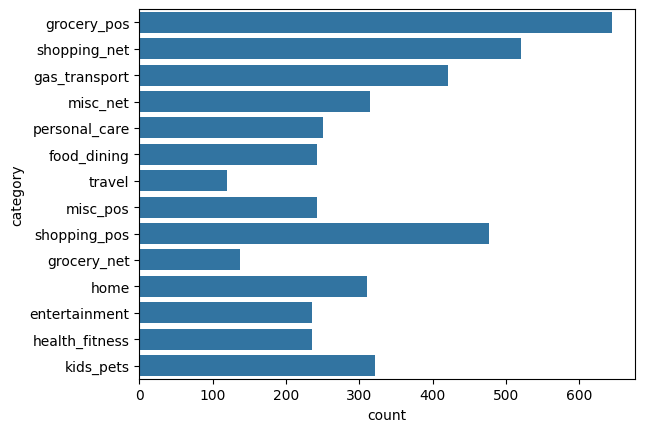

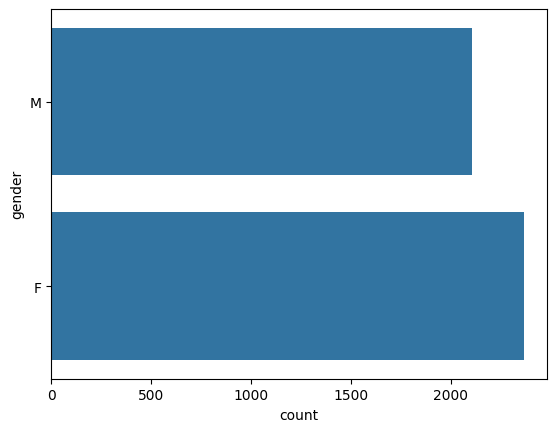

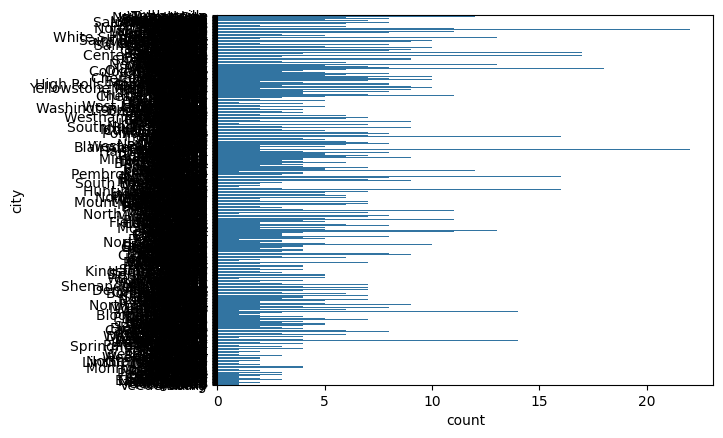

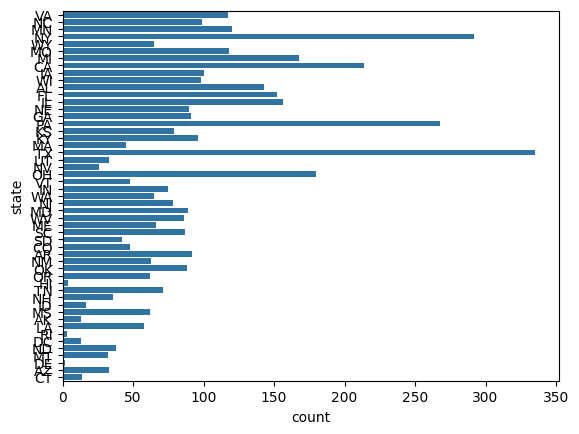

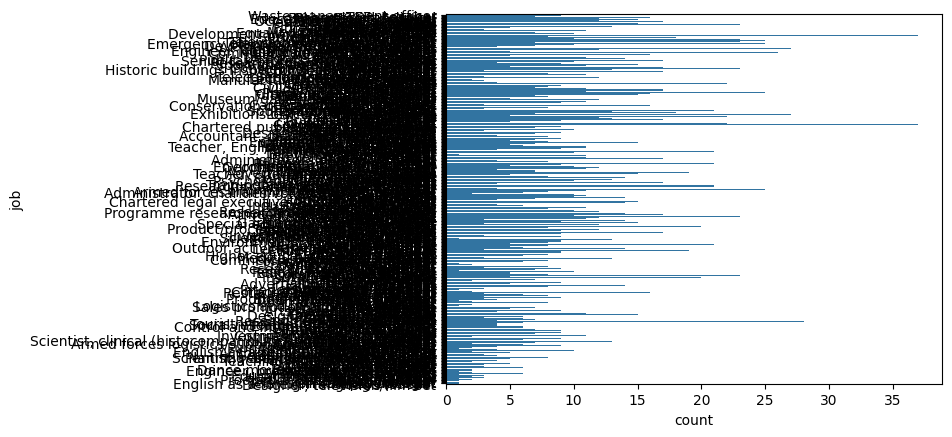

In [74]:
for col1 in df.select_dtypes('O').columns:
    plt.figure()
    sns.countplot(df[col1])

In [75]:
df.columns

Index(['category', 'gender', 'city', 'state', 'job', 'is_fraud', 'year',
       'month', 'day', 'amount', 'city_population', 'destiance_c_to_m',
       'year_birth'],
      dtype='object')

In [76]:
df.drop(['city' , 'state' , 'job'] , axis=1 , inplace=True)

In [77]:
df['is_fraud'].value_counts()

is_fraud
0    3000
1    1470
Name: count, dtype: int64

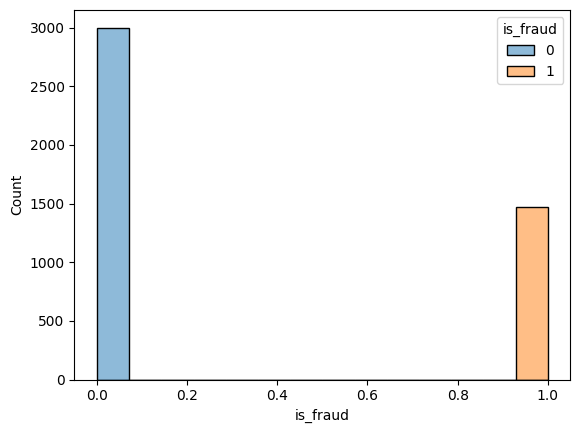

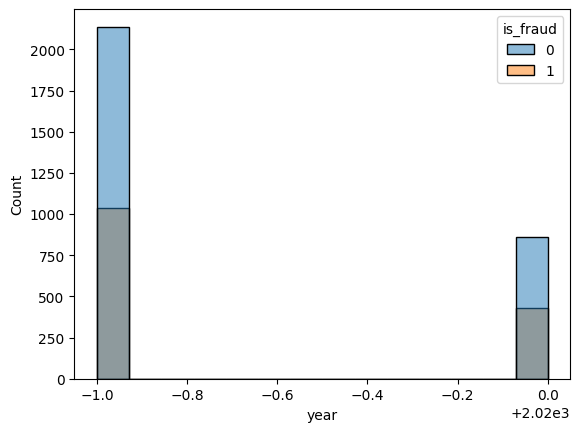

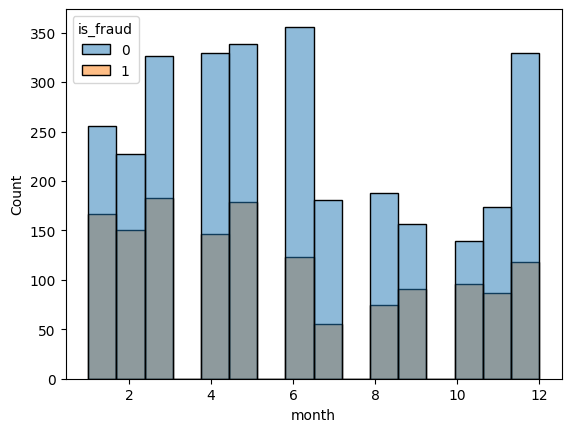

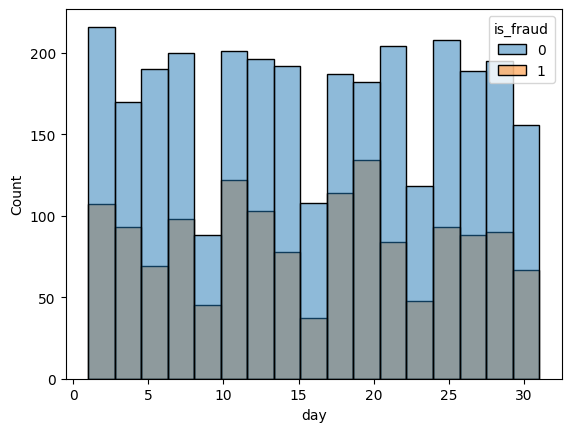

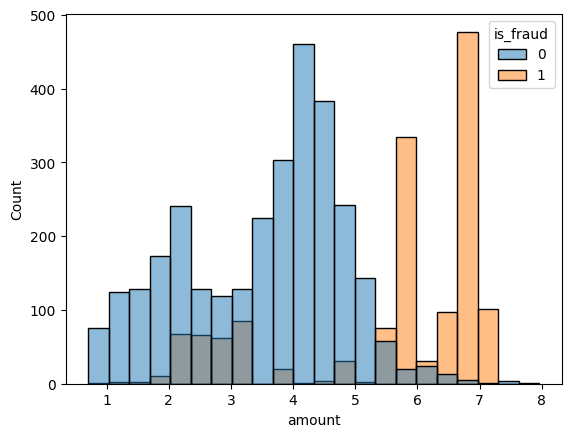

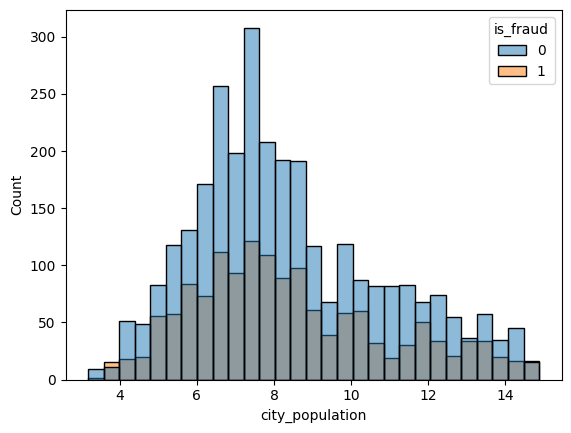

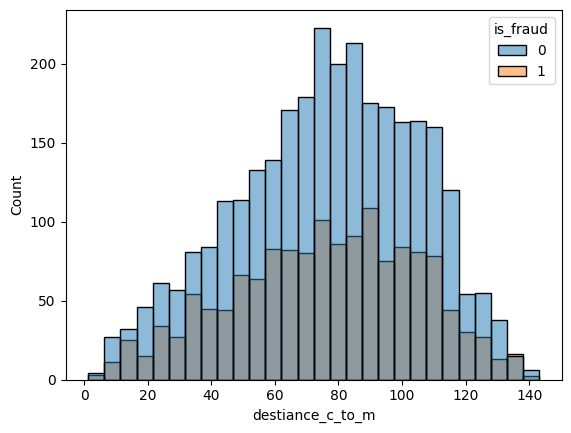

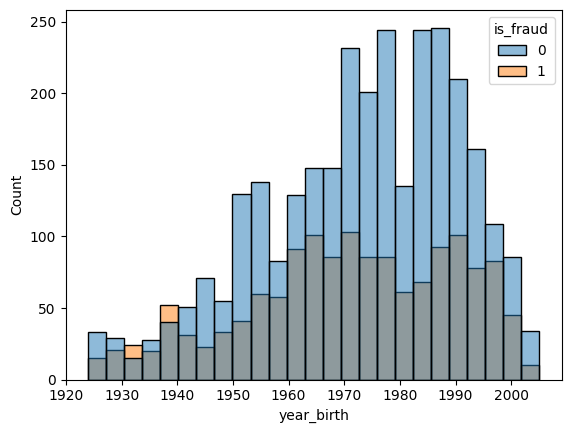

In [78]:
for col1 in df.select_dtypes('number').columns:
    plt.figure()
    sns.histplot(data=df , x = df[col1] , hue='is_fraud')

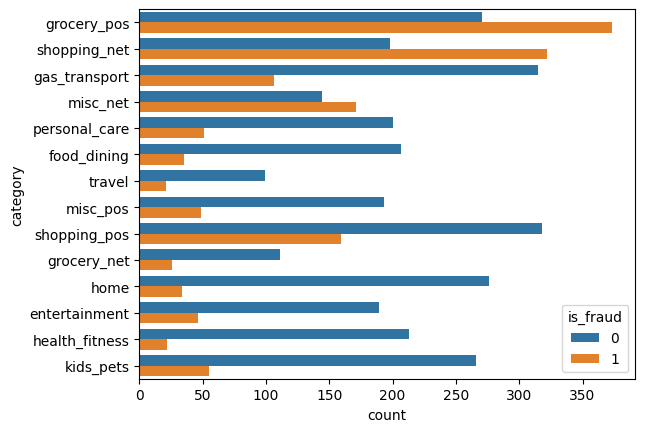

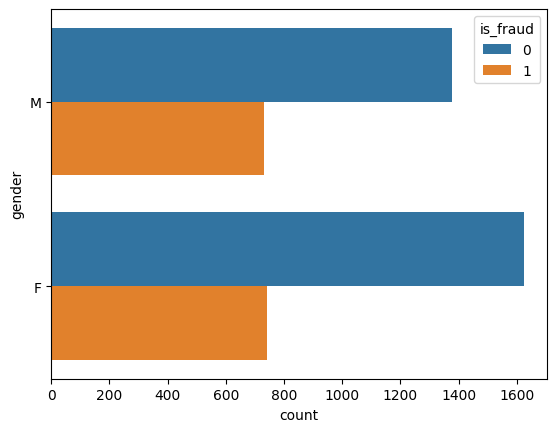

In [79]:
for col1 in df.select_dtypes('O').columns:
    plt.figure()
    sns.countplot(data=df , y = df[col1] , hue='is_fraud')

In [80]:
x , y = df.drop(['is_fraud'] , axis=1) , df['is_fraud']

In [81]:
encoding = ColumnTransformer(transformers=[
    ('ohe' , OneHotEncoder(sparse_output=False , drop='first') , ['category' , 'gender']),
],remainder='passthrough')

In [82]:
pl = make_pipeline(encoding , StandardScaler() , LogisticRegression())
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['category', 'gender'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [83]:
cv = cross_validate(estimator=pl , X = x , y = y , cv = 5 , scoring = 'accuracy', return_train_score = True,error_score='raise')
cv

{'fit_time': array([0.02843142, 0.0187161 , 0.02515507, 0.0244143 , 0.03333211]),
 'score_time': array([0.00845194, 0.00826025, 0.00757146, 0.01038384, 0.        ]),
 'test_score': array([0.87583893, 0.86129754, 0.85011186, 0.87024609, 0.87583893]),
 'train_score': array([0.86828859, 0.87248322, 0.87276286, 0.86856823, 0.86549217])}

In [84]:
print(f'Accuracy for Train is : {cv['train_score'].mean()}')
print(f'Accuracy for Test is : {cv['test_score'].mean()}')

Accuracy for Train is : 0.8695190156599552
Accuracy for Test is : 0.8666666666666668


In [85]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

In [86]:
scoring ={
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

In [87]:
#x_res, y_res = RandomUnderSampler(sampling_strategy={0: 30000}).fit_resample(x, y)

for model in models:
    pl = make_pipeline(encoding , StandardScaler() #,RandomUnderSampler(sampling_strategy={0:30000})
                       , model)

    cv = cross_validate(estimator=pl , X = x , y = y, cv = StratifiedKFold(n_splits=5) , scoring=scoring ,return_train_score=True)

    print(model)
    print(f"Mean of Accuracy for Train is : {cv['train_accuracy'].mean():.4f}")
    print(f"Mean of Accuracy for Test is : {cv['test_accuracy'].mean():.4f}")
    print(f"Mean of Recall for Train is : {cv['train_recall'].mean():.4f}")
    print(f"Mean of Recall for Test is : {cv['test_recall'].mean():.4f}")
    print(f"Mean of Precision for Train is : {cv['train_precision'].mean():.4f}")
    print(f"Mean of Precision for Test is : {cv['test_precision'].mean():.4f}")
    print(f"Mean of F1 for Train is : {cv['train_f1'].mean():.4f}")
    print(f"Mean of F1 for Test is : {cv['test_f1'].mean():.4f}")
    print('-'*50)


LogisticRegression()
Mean of Accuracy for Train is : 0.8695
Mean of Accuracy for Test is : 0.8667
Mean of Recall for Train is : 0.7257
Mean of Recall for Test is : 0.7245
Mean of Precision for Train is : 0.8556
Mean of Precision for Test is : 0.8486
Mean of F1 for Train is : 0.7853
Mean of F1 for Test is : 0.7813
--------------------------------------------------
KNeighborsClassifier()
Mean of Accuracy for Train is : 0.8923
Mean of Accuracy for Test is : 0.8394
Mean of Recall for Train is : 0.7837
Mean of Recall for Test is : 0.7020
Mean of Precision for Train is : 0.8757
Mean of Precision for Test is : 0.7882
Mean of F1 for Train is : 0.8271
Mean of F1 for Test is : 0.7418
--------------------------------------------------
SVC()
Mean of Accuracy for Train is : 0.9266
Mean of Accuracy for Test is : 0.9201
Mean of Recall for Train is : 0.8165
Mean of Recall for Test is : 0.8048
Mean of Precision for Train is : 0.9535
Mean of Precision for Test is : 0.9444
Mean of F1 for Train is : 0.879

C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

AdaBoostClassifier()
Mean of Accuracy for Train is : 0.9347
Mean of Accuracy for Test is : 0.9262
Mean of Recall for Train is : 0.8517
Mean of Recall for Test is : 0.8354
Mean of Precision for Train is : 0.9443
Mean of Precision for Test is : 0.9334
Mean of F1 for Train is : 0.8956
Mean of F1 for Test is : 0.8816
--------------------------------------------------
GradientBoostingClassifier()
Mean of Accuracy for Train is : 0.9627
Mean of Accuracy for Test is : 0.9477
Mean of Recall for Train is : 0.9179
Mean of Recall for Test is : 0.8952
Mean of Precision for Train is : 0.9670
Mean of Precision for Test is : 0.9433
Mean of F1 for Train is : 0.9418
Mean of F1 for Test is : 0.9185
--------------------------------------------------


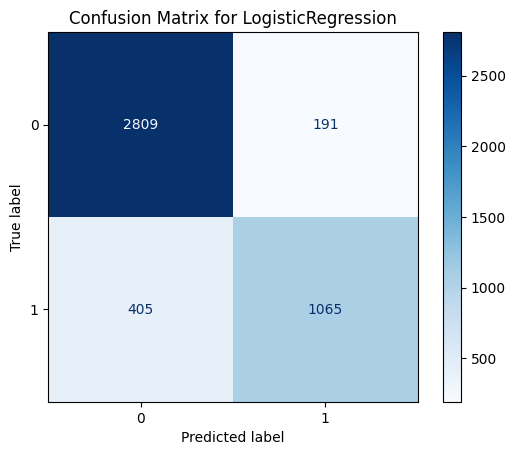

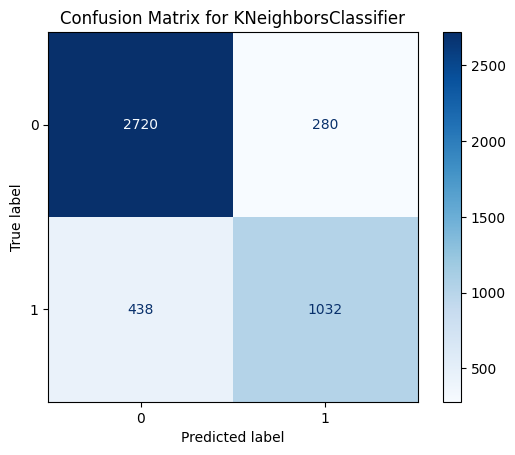

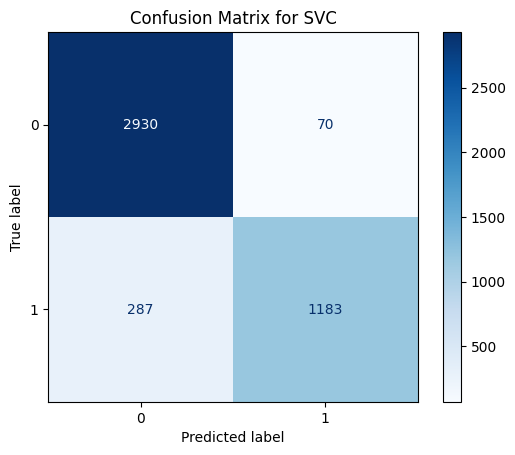

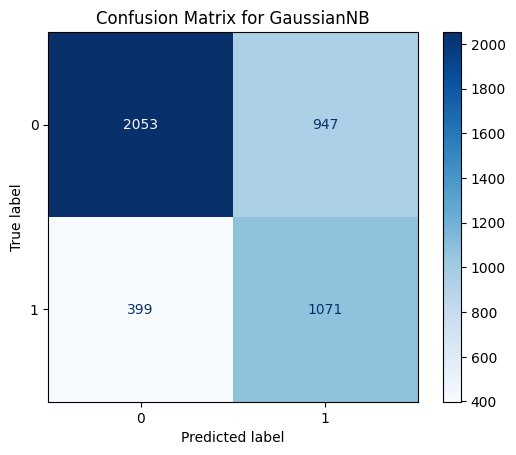

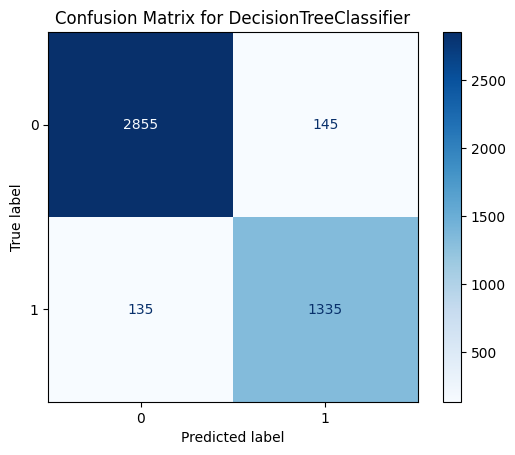

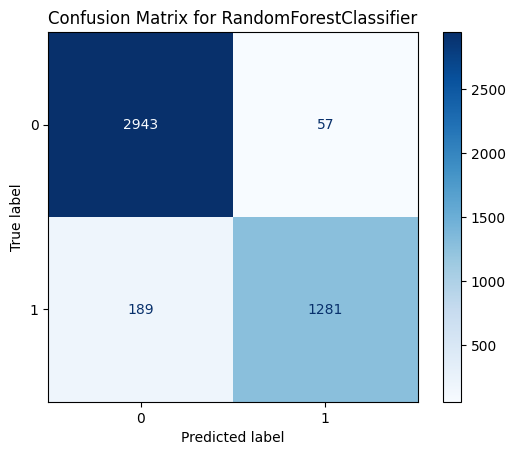

C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

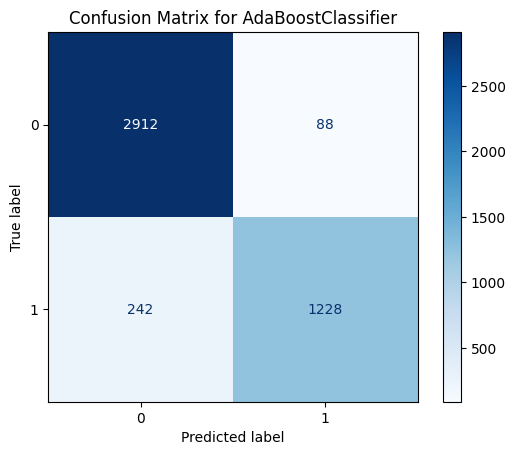

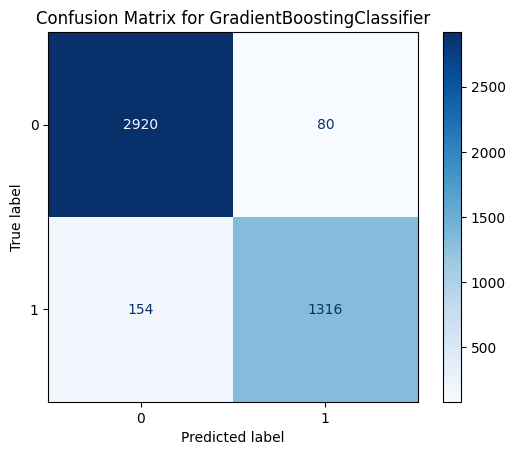

In [88]:
for model in models:
    pl = make_pipeline(encoding, StandardScaler(), model)

    y_pred = cross_val_predict(pl, X=x, y=y, cv=StratifiedKFold(n_splits=5))

    cm = confusion_matrix(y, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pl.classes_ if hasattr(pl, 'classes_') else [0, 1])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

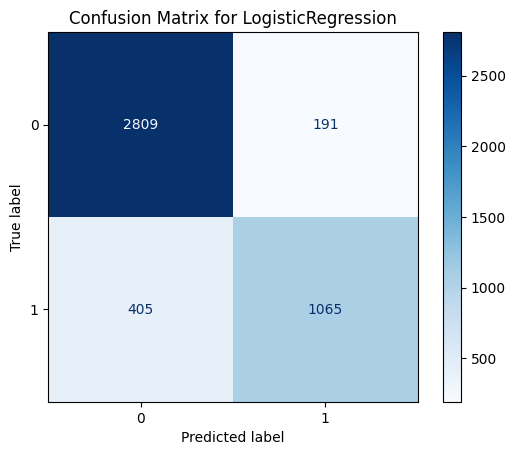

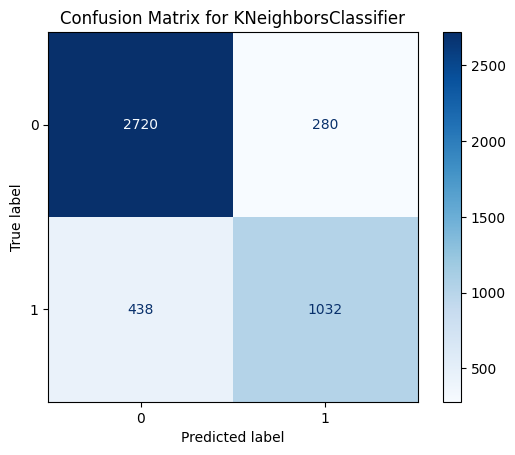

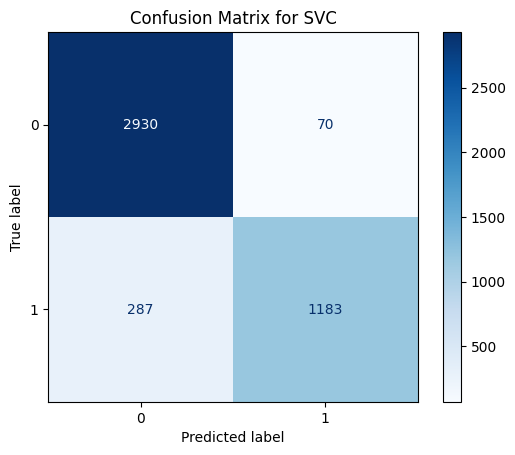

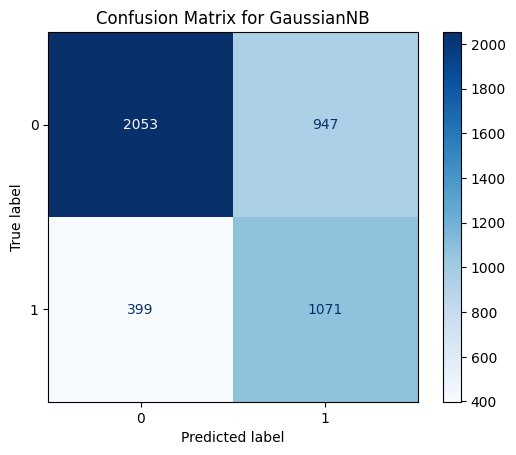

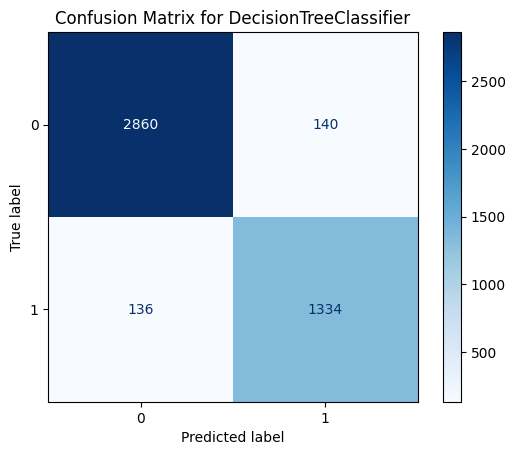

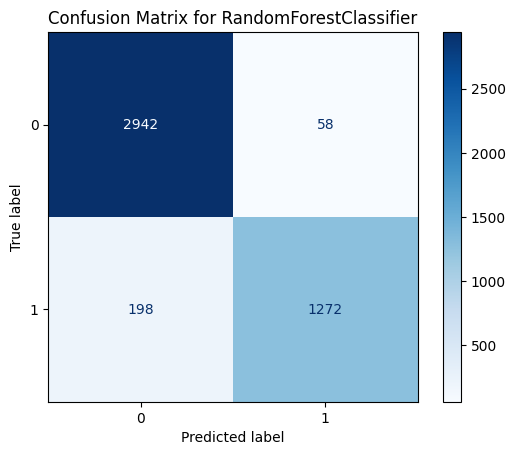

C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

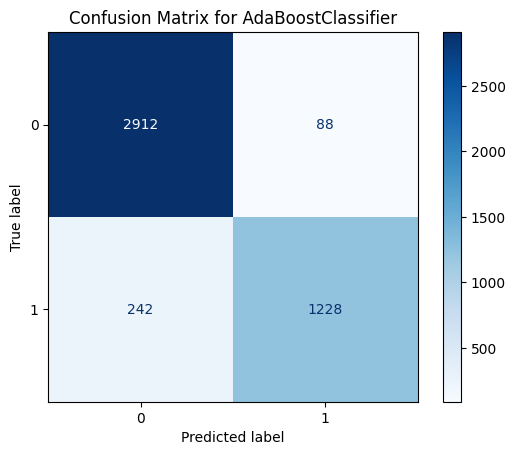

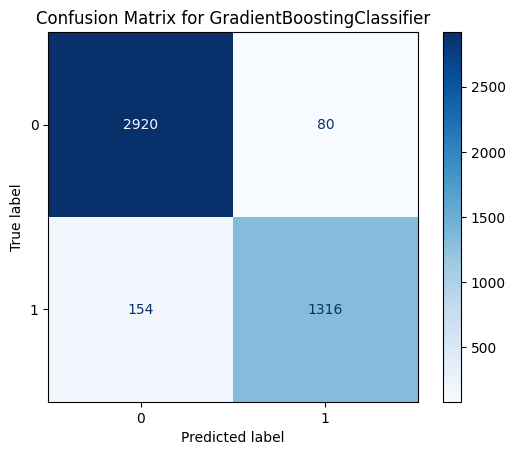

In [90]:
for model in models:
    pl = make_pipeline(encoding, StandardScaler(), model)  # remove undersampler from pipeline

    y_pred = cross_val_predict(pl, X=x, y=y, cv=StratifiedKFold(n_splits=5))

    cm = confusion_matrix(y, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()


# DT Tunning

### LogisticRegression

In [91]:
lr = make_pipeline(encoding , StandardScaler() , PolynomialFeatures() , LogisticRegression(max_iter=1000)
                  )
lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['category', 'gender'])])),
                ('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [92]:
lr.steps

[('columntransformer',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('ohe',
                                   OneHotEncoder(drop='first',
                                                 sparse_output=False),
                                   ['category', 'gender'])])),
 ('standardscaler', StandardScaler()),
 ('polynomialfeatures', PolynomialFeatures()),
 ('logisticregression', LogisticRegression(max_iter=1000))]

In [93]:
lr_pram = [
    {
        'polynomialfeatures__degree':[1 , 2 , 3 , 4 ],
        'logisticregression__C':[0.1 , 0.5 , 1 , 5 , 10]
    }
]

In [94]:
lr_srch = GridSearchCV(estimator=lr , param_grid=lr_pram,
                       scoring='accuracy' , 
                       cv = StratifiedKFold(n_splits=5) , 
                       return_train_score=True)

In [95]:
lr_srch.fit(x , y)


KeyboardInterrupt



### SVC

In [96]:
svc = make_pipeline(encoding , StandardScaler() ,  SVC())
svc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['category', 'gender'])])),
                ('standardscaler', StandardScaler()), ('svc', SVC())])

In [97]:
lr_pram = [
     {
        'svc__kernel' : ['linear'],
        'svc__C' : [0.1 , 1 , 5]
    },
    {
        'svc__kernel' : ['poly'],
        'svc__C' : [0.1 , 1 , 5],
        'svc__degree' : [2,3]
    },
    {
        'svc__kernel' : ['rbf'],
        'svc__gamma' : [0.1 , 0.5 , 1 , 5 , 10],
    }
]

In [98]:
svc_srch = GridSearchCV(estimator=svc ,
                        param_grid= lr_pram,
                        scoring='accuracy' , 
                        cv = StratifiedKFold(n_splits=5) ,
                        return_train_score=True)

In [99]:
svc_srch.fit(x , y)

C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['category',
                                                                          'gender'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [0.1, 1, 5], 'svc__kernel': ['linear']},
                         {'svc__C': [0.1, 1, 5], 'svc__degree': [2, 3],
                          'svc__kernel': ['poly']},
                         {'svc__gamma': [0.1, 0.5, 1, 5, 10],
                          'svc__kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [100]:
svc_srch.best_params_

{'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [101]:
svc_srch.best_score_

np.float64(0.9237136465324385)

In [102]:
svc_srch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['category', 'gender'])])),
                ('standardscaler', StandardScaler()), ('svc', SVC(gamma=0.1))])

### DecisionTreeClassifier

In [103]:
dt = make_pipeline(encoding , StandardScaler() ,  DecisionTreeClassifier())
dt

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['category', 'gender'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [104]:
dt_params = [
    {
        'decisiontreeclassifier__criterion' : ["log_loss"],
        'decisiontreeclassifier__splitter' : ["best"],
        'decisiontreeclassifier__max_depth' : [13],
        'decisiontreeclassifier__min_samples_split' : [20]
    }
]

In [105]:
dt_srch = GridSearchCV(
    estimator=dt,
    param_grid=dt_params, 
    scoring='recall',
    cv=StratifiedKFold(n_splits=5),
    return_train_score=True
)

In [107]:
dt_srch.fit(x , y)

C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['category',
                                                                          'gender'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid=[{'decisiontreeclassifier__criterion': ['log_loss'],
                          'decisiontreeclassifier__max_depth': [13],
                          'decisiontreeclassifier__min_samples_split': [20],
                          'decisiontreeclassifier__splitter': ['best']}],
             return_train_score=True, scoring='recall')

In [108]:
dt_srch.best_score_

np.float64(0.9142857142857143)

In [109]:
dt_srch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['category', 'gender'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=13,
                                        min_samples_split=20))])

In [110]:
dt_srch.cv_results_['mean_train_score']

array([0.95952381])

In [111]:
dt_srch.cv_results_['mean_test_score']

array([0.91428571])

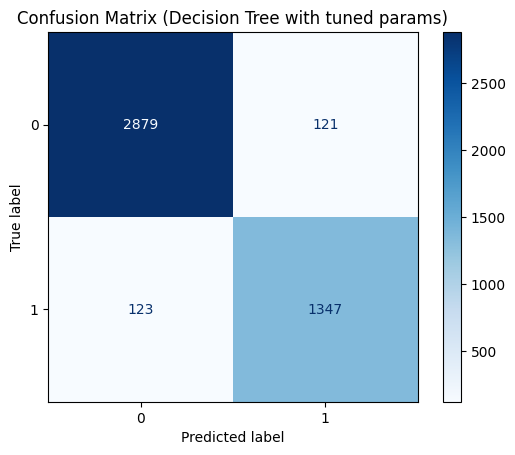

In [115]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_model = dt_srch.best_estimator_

y_pred = cross_val_predict(best_model, X=x, y=y, cv=StratifiedKFold(n_splits=5))

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Decision Tree with tuned params)")
plt.show()


# RF Tunning

In [116]:
rf_model = RandomForestClassifier(random_state=42)

rf_pipe = make_pipeline(encoding, StandardScaler(), rf_model)

rf_params = [
    {
        'randomforestclassifier__criterion': ['log_loss'],
        'randomforestclassifier__max_depth': [13,15,10],
        'randomforestclassifier__min_samples_split': [20,15,25],
    }
]

In [117]:
rf_srch = GridSearchCV(
    estimator=rf_pipe, 
    param_grid=rf_params, 
    scoring='recall',
    cv=StratifiedKFold(n_splits=5),
    return_train_score=True
)

rf_srch.fit(x, y)

C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['category',
                                                                          'gender'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'randomforestclassifier__criterion': ['log_loss'],
                          'randomforestclassifier__max_depth': [13, 15, 10],
                          'randomforestclassifier__min_samples_split': [20, 15,
                                                                        25]}],
             return_train_score=True, scoring='recall')

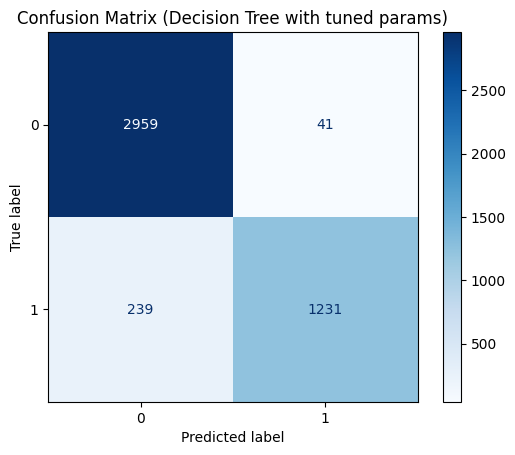

In [119]:
best_model = rf_srch.best_estimator_

y_pred = cross_val_predict(best_model, X=x, y=y, cv=StratifiedKFold(n_splits=5))

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Decision Tree with tuned params)")
plt.show()


In [122]:
rf_srch.cv_results_['mean_train_score']

array([0.84727891, 0.85663265, 0.84557823, 0.86955782, 0.88095238,
       0.85986395, 0.81921769, 0.82278912, 0.81768707])

In [121]:
rf_srch.cv_results_['mean_test_score']

array([0.82653061, 0.82789116, 0.8244898 , 0.83673469, 0.83741497,
       0.83197279, 0.79931973, 0.80068027, 0.80136054])

# GB Tunning

In [125]:
gb = GradientBoostingClassifier(random_state=42)

gb_pipe = make_pipeline(encoding, StandardScaler(), gb)

gb_params = [
    {
        'gradientboostingclassifier__criterion': ['friedman_mse'],
        'gradientboostingclassifier__max_depth': [13],
        'gradientboostingclassifier__min_samples_split': [10]  
    }
]


In [127]:
gb_srch = GridSearchCV(
    estimator=gb_pipe,
    param_grid=gb_params, 
    scoring='recall',
    cv=StratifiedKFold(n_splits=5),
    return_train_score=True
)

gb_srch.fit(x , y)

C:\Users\ASUS\anaconda3\envs\DS\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['category',
                                                                          'gender'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid=[{'gradientboostingclassifier__criterion': ['friedman_mse'],
                          'gradientboostingclassifier__max_depth': [13],
                          'gradientboostingclassifier__min_samples_split': [10]}],
             return_train_score=True, scoring='recall')

In [128]:
gb_srch.best_params_

{'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__max_depth': 13,
 'gradientboostingclassifier__min_samples_split': 10}

In [129]:
gb_srch.best_score_

np.float64(0.9251700680272108)

### from the previous operation the best model is `SVC`

##### we save the model in `joblib` file to use it in Deployment

In [130]:
joblib.dump(svc_srch.best_estimator_ ,'SVC.h5')

['SVC.h5']

In [131]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import joblib

# === Load your trained SVC model ===
model = joblib.load("SVC.h5")

# === Define features and their types from your dataset ===
expected_features = {
    "category": "categorical",
    "gender": "categorical",
    "year": "numeric",
    "month": "numeric",
    "day": "numeric",
    "amount": "numeric",
    "city_population": "numeric",
    "destiance_c_to_m": "numeric",
    "year_birth": "numeric"
}

# === Streamlit Page Config ===
st.set_page_config(page_title="🔍 Smart Fraud Detection App", layout="wide")
st.title("🔐 Smart Fraud Detection with Support Vector Classifier")
st.markdown("""
<style>
    .main {
        background-color: #f0f2f6;
    }
    h1, h2, h3 {
        color: #2c3e50;
    }
    .stButton>button {
        background-color: #4CAF50;
        color: white;
        border-radius: 10px;
        font-size: 16px;
        padding: 10px 24px;
    }
    .feature-label {
        font-weight: 600;
        margin-bottom: 4px;
        color: #34495e;
    }
</style>
""", unsafe_allow_html=True)

# === Sidebar: Upload or Manual Input ===
st.sidebar.header("📂 Upload Data or Use Manual Input")
uploaded_file = st.sidebar.file_uploader("Upload a CSV file", type=["csv"])
manual_mode = st.sidebar.checkbox("🛠️ Use Manual Input (No File)")

# === If user uploads a file ===
if uploaded_file and not manual_mode:
    df = pd.read_csv(uploaded_file)
    st.subheader("🔎 Data Preview")
    st.dataframe(df.head())

    st.sidebar.subheader("⚙️ Select Columns")
    target_col = st.sidebar.selectbox("Target column (fraud class)", df.columns)
    feature_cols = st.sidebar.multiselect("Feature columns", [col for col in df.columns if col != target_col])

    if st.sidebar.button("🚀 Predict and Evaluate"):
        X = df[feature_cols]
        y = df[target_col]

        st.subheader("📊 Evaluation Metrics")
        y_pred = cross_val_predict(model, X, y, cv=StratifiedKFold(n_splits=5))

        report = classification_report(y, y_pred, target_names=["Not Fraud", "Fraud"], output_dict=True)
        st.dataframe(pd.DataFrame(report).transpose())

        st.subheader("🧮 Confusion Matrix")
        cm = confusion_matrix(y, y_pred)
        fig, ax = plt.subplots()
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
        disp.plot(ax=ax, cmap="Purples", values_format="d")
        st.pyplot(fig)

        st.success("✅ Evaluation Complete!")

        if st.checkbox("💾 Save Predictions"):
            df['prediction'] = y_pred
            st.download_button("Download as CSV", df.to_csv(index=False), "fraud_predictions.csv")

# === Manual Input Form ===
if manual_mode:
    st.markdown("---")
    st.subheader("🧮 Manually Predict a Transaction")
    st.markdown("Enter the values for the required features:")

    user_input = {}
    for feature, ftype in expected_features.items():
        st.markdown(f"<div class='feature-label'>{feature} ({ftype})</div>", unsafe_allow_html=True)
        if ftype == "numeric":
            user_input[feature] = st.number_input("", key=f"{feature}_num")
        else:
            user_input[feature] = st.text_input("", key=f"{feature}_cat")

    if st.button("🔎 Predict Now"):
        try:
            input_df = pd.DataFrame([user_input])
            prediction = model.predict(input_df)[0]
            label = "🚨 Fraud Detected!" if prediction == 1 else "✅ Not Fraudulent"
            color = "red" if prediction == 1 else "green"
            st.markdown(f"<h3 style='color:{color}'>{label}</h3>", unsafe_allow_html=True)
        except Exception as e:
            st.error(f"❌ Prediction failed. Check inputs and feature types.\n\nError: {e}")

# === If neither mode selected ===
if not uploaded_file and not manual_mode:
    st.info("👈 Please upload a dataset or enable manual input to get started!")


Overwriting app.py


In [ ]:
! streamlit run app.py

In [404]:
#df.to_csv("fraud_predictions.csv", index=False)

In [428]:
df

,category,gender,is_fraud,year,month,day,amount,city_population,destiance_c_to_m,year_birth
0,misc_net,M,1,2020,3,31,6.773664,13.537820,65.903821,1966
1,shopping_net,F,1,2020,3,18,6.928087,12.004054,106.824729,2004
2,shopping_net,M,1,2019,12,20,6.770732,8.621373,35.660335,1975
3,shopping_net,M,1,2019,10,12,6.762498,7.548556,106.905075,1953
4,shopping_pos,M,1,2020,5,25,6.789703,5.036953,77.620243,1962
...,...,...,...,...,...,...,...,...,...,...
4416,shopping_pos,M,0,2019,10,26,5.008299,7.518607,88.303179,1975
4417,health_fitness,F,0,2020,3,29,3.501043,7.473637,50.274755,1972
4418,grocery_pos,F,0,2019,8,4,4.861516,5.252273,17.183836,1970
4419,personal_care,F,0,2019,7,11,4.131319,7.963112,140.852880,1987
